In [13]:
import pandas as pd
import numpy as np
import random
from numpy.linalg import inv

In [14]:
# READ DATASET
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [15]:
# PREPARE DATA
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = test.values.reshape(-1,28,28,1)
print(X_train.shape)

(42000, 28, 28, 1)


In [16]:
# NORMALIZE DATA
X_train = X_train/255.0
X_test = X_test/255.0

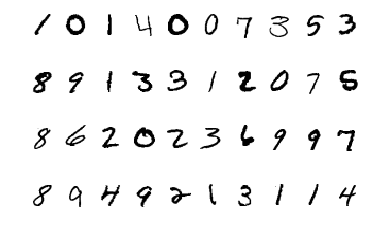

In [17]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.show()

In [8]:
print("***APPLY CLOSED-FORM...")
#w=(X.transpose * X).inverse*X.transpose*Y
#a = X.transpose * X
#b = a.inversve * X.transpose
#w=b*Y
X_train = X_train.reshape(42000,784)
print(X_train.shape)
a = np.matrix(np.dot(np.matrix(X_train).T, np.matrix(X_train)))
a = inv(a) #CANNOT INVERT AS a is A SINGULAR MATRIX
b = np.matrix(np.dot(a, np.matrix(X_train).T))
w = np.dot(np.array(b),np.array(Y_train))
print("******CLOSED_FORM, Result W(w0,w1,w2...) vector: ", w)

***APPLY CLOSED-FORM...
(42000, 784)


LinAlgError: Singular matrix

In [18]:
print("***APPLY GRADIENT DESCENT...")
#------------------------------------------------------------
def gradient_descent(y, x, weight_vector, l_rate, iters):
    m = np.array(y).size
    for i in range(iters):
        y_predictions = np.array(np.dot(x, weight_vector))
        weight_vector = weight_vector - l_rate*(1/m)*np.dot(np.array(x).T, y_predictions - np.array(y))
    return weight_vector
#-------------------------------------------------------------#Add x0 to the X matrix
X_train = X_train.reshape(42000,784)
print("To prepare for the Gradient Descent Algorithm in the next step, it needs to add x0 vector (x0 = 1) to the X matrix")
#Add x0 to the X matrix
X0 = np.ones((42000,1))
X_train = np.hstack((X0,X_train))
print(X_train[:3])
#Declare W vector
wlength = 784
W = []
print("******W(w0,w1,w2) vector will be initialized, corresponding to the X matrix (x0(1), x1, x2 above.")
#Initialize the W vector, 784 + 1 entries for w0
W = [random.random()*random.randint(1,10) for x in range(wlength + 1 )]
#Pick the learning rate
learning_rate = 0.5
#Pick the iterations
iterations = 100
#Execute Gradient Descent
print("******Start Gradient Descent algorithm - batch process")
W = gradient_descent(Y_train, X_train, W, learning_rate, iterations)
print("******GRADIENT DESCENT, Result W(w0,w1,w2...) vector: ", W[:5])
print("******End Gradient Descent algorithm")

***APPLY GRADIENT DESCENT...
To prepare for the Gradient Descent Algorithm in the next step, it needs to add x0 vector (x0 = 1) to the X matrix
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
******W(w0,w1,w2) vector will be initialized, corresponding to the X matrix (x0(1), x1, x2 above.
******Start Gradient Descent algorithm - batch process
******GRADIENT DESCENT, Result W(w0,w1,w2...) vector:  [7.29463226e+127 2.40625125e-001 9.87341796e-001 6.93464839e+000
 6.81397066e+000]
******End Gradient Descent algorithm


In [19]:
#PREDICT DIGIT
def predictY(x, weight_vector):
    result = []
    for i in range (len(np.array(x))):
        temp = 0
        for j in range (len(np.array(weight_vector))):
            temp = temp + weight_vector[j]*x[i][j]
        result.append(temp)
    return(result)

X_test = X_test.reshape(28000,784)
print(X_test.shape)
#Add x0 to the X matrix
X0 = np.ones((len(X_test),1))
X_test_tmp = np.hstack((X0,X_test))
Y_predicted = predictY(X_test_tmp, W)
print(Y_predicted[:5])


(28000, 784)
[3.8954815005719456e+129, 3.658980034635497e+129, 1.8293601991034187e+129, 1.961558153480164e+129, 2.83652974862855e+129]


The first 10 images in the test set



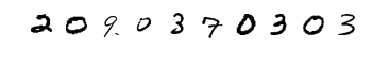

The first 10 Y_predicted from Gradient Descent

[3.8954815005719456e+129, 3.658980034635497e+129, 1.8293601991034187e+129, 1.961558153480164e+129, 2.83652974862855e+129, 2.3352912889365855e+129, 4.3616407622267916e+129, 3.644503111058372e+129, 3.3745334911955365e+129, 2.5360923960874446e+129]

CONCLUSION: Gragient descent algorithm doesn't work for MNIST


In [23]:
#PREDICT DIGIT vs ACTUAL DIGIT
print ("The first 10 images in the test set\n")
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.show()
print ("The first 10 Y_predicted from Gradient Descent\n")
print(Y_predicted[0:10])
print("\nCONCLUSION: Gragient descent algorithm doesn't work for MNIST")